# Imports

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
import re
import seaborn as sns
import tensorflow as tf

In [135]:
from wordcloud import WordCloud

## Loading the Data

In [136]:
target = ['sentiment', 'text']
df = pd.read_csv('../../data/raw/sentimentDataset/test.csv',
                encoding='ISO-8859-1',
                usecols=target)
df.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [137]:
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.info())

(4815, 2)
text         1281
sentiment    1281
dtype: int64
1280
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3534 non-null   object
 1   sentiment  3534 non-null   object
dtypes: object(2)
memory usage: 75.4+ KB
None


In [138]:
print(df['sentiment'].isna().sum())
print(df['sentiment'].isnull().sum())

1281
1281


In [139]:
df['sentiment'] = df['sentiment'].fillna('neutral')

In [140]:
def clean(text):
    text = re.sub(r'[^\w\s]', '', text)
    # Conver to lower
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [141]:
df['text'] = df['text'].fillna('')
df['text'] = df['text'].apply(clean)

In [142]:
for i in range(10):
    print(df['text'][i+1])

shanghai is also really exciting precisely skyscrapers galore good tweeps in china sh bj
recession hit veronique branquinho she has to quit her company such a shame
happy bday
httptwitpiccom4w75p i like it
thats great weee visitors
i think everyone hates me on here lol
soooooo wish i could but im in school and myspace is completely blocked
and within a short time of the last clue all of them
what did you get my day is alright havent done anything yet leaving soon to my stepsister though
my bike was put on holdshould have known that argh total bummer


# Data Exploration 

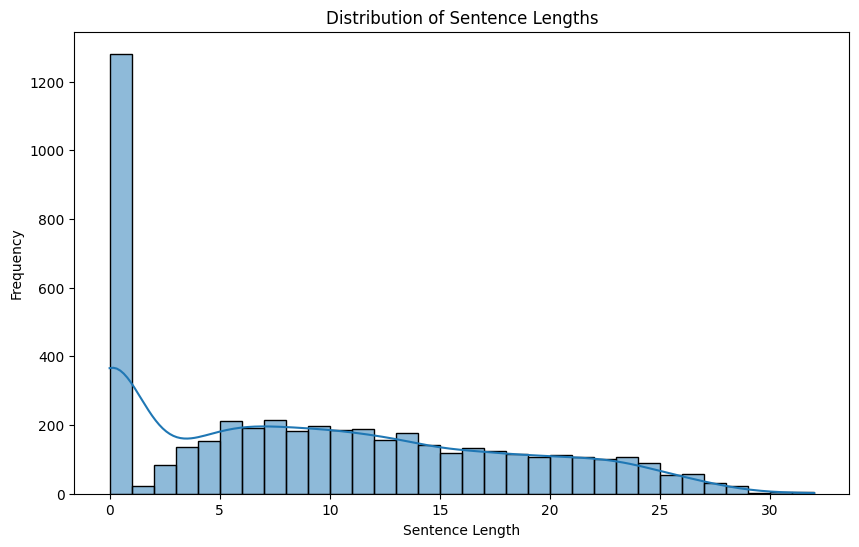

In [143]:
# sentence-length distribution
senLen = [len(text.split()) for text in df['text']]
plt.figure(figsize=(10, 6))
sns.histplot(senLen, bins=range(min(senLen), max(senLen) + 1, 1), kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

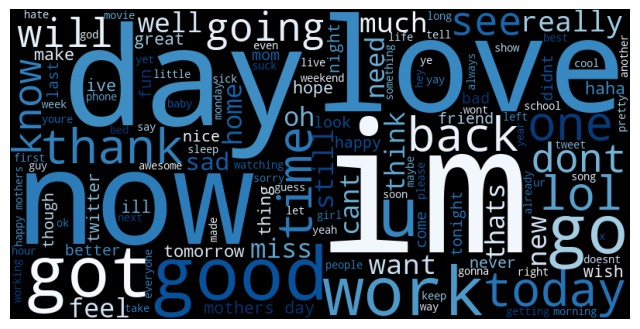

In [144]:
# worlCloud for all texts
allText = ' '.join(df['text'])
cloud = WordCloud(width=800, height=400,
                  background_color='black',
                  min_font_size=12, max_words=350, colormap='Blues').generate(allText)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis("off")
 
plt.show()

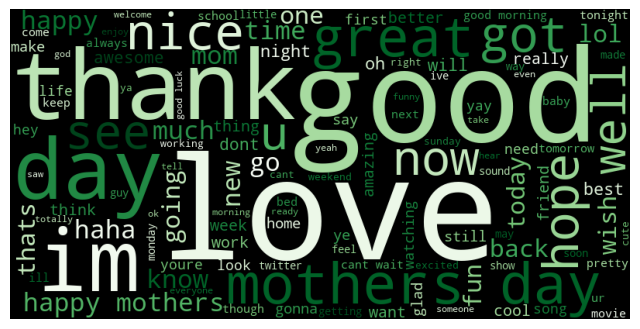

In [145]:
# worlCloud for positive texts
posText = ' '.join(df[df['sentiment'] == 'positive']['text'])
cloud = WordCloud(width=800, height=400,
                  background_color='black',
                  min_font_size=12, max_words=350, colormap='Greens').generate(posText)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis("off")
 
plt.show()

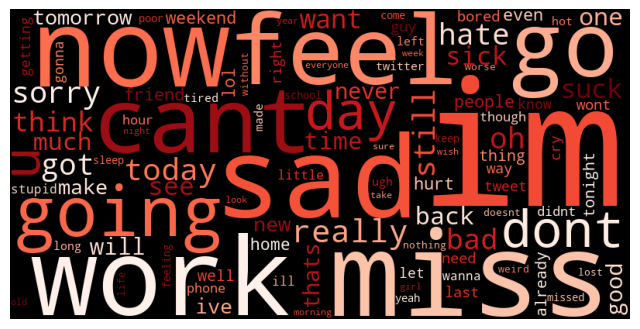

In [146]:
# worlCloud for negative texts
negText = ' '.join(df[df['sentiment'] == 'negative']['text'])
cloud = WordCloud(width=800, height=400,
                  background_color='black',
                  min_font_size=12, max_words=350, colormap='Reds').generate(negText)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis("off")
 
plt.show()

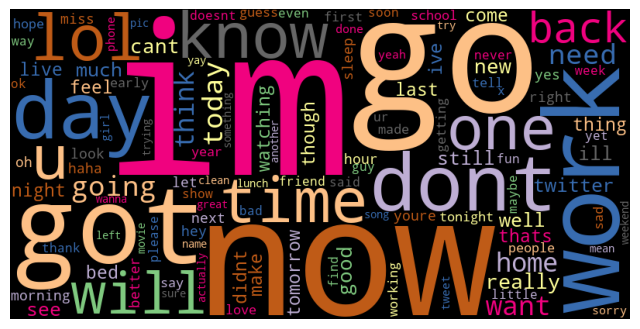

In [147]:
# worlCloud for neutral texts
neuText = ' '.join(df[df['sentiment'] == 'neutral']['text'])
cloud = WordCloud(width=800, height=400,
                  background_color='black',
                  min_font_size=12, max_words=350, colormap='Accent').generate(neuText)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis("off")
 
plt.show()